# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]


<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [79]:
import pandas as pd 
data = pd.read_csv('preprocessed_data.csv')

In [80]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [81]:
data.shape

(109248, 9)

### calculate the sentiment scores for each review/essay


In [82]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()
 
score= []                       # it will store all the sentiment score value for all review/essay
for sentence in data['essay']:
    ss = sentiment.polarity_scores(sentence)
    score.append(ss)

# these ss are in dictionary format means score will be list of dict value 

# to build the newdataframe and combine with orginial dataframe we need to find the column names 

keys = list(ss.keys())

# now get the list of value of sentiment score 
value=[]
for val in score:
    value.append(val.values())
    
# now built the new dataframe with value as value and keys as column names 

new_df = pd.DataFrame(value,columns=keys)

new_df.head()



,neg,neu,pos,compound
0,0.013,0.783,0.205,0.9867
1,0.072,0.680,0.248,0.9897
2,0.017,0.721,0.262,0.9860
3,0.030,0.783,0.187,0.9524
4,0.029,0.683,0.288,0.9873


In [83]:
new_df.shape

(109248, 4)

##### combine the new_df with data 

In [84]:
Data = pd.concat([data,new_df],axis =1)
Data.head()


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,neg,neu,pos,compound
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,0.013,0.783,0.205,0.9867
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,0.072,0.680,0.248,0.9897
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00,0.017,0.721,0.262,0.9860
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04,0.030,0.783,0.187,0.9524
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74,0.029,0.683,0.288,0.9873


In [85]:
Data.shape

# now we have 13 feature after combining the sentimental score for each essay

(109248, 13)

### load the glove vector
which will be used for getting the W2v of word

In [86]:
import pickle

with open('glove_vectors','rb') as f:
    model = pickle.load(f)
    glove_words = set(model.keys())
    

In [87]:
#glove_words

In [88]:
#model

if we want to get the vector for any word simply write 

value = model['word name']

it will gives the vector for that word if it is present in the glove words/model 

In [89]:
df = pd.DataFrame(Data)

In [90]:
# divide the target y from other data 

X = df.drop(['project_is_approved'],axis =1)
y = df['project_is_approved']

X.head()


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,neg,neu,pos,compound
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,0.013,0.783,0.205,0.9867
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,0.072,0.680,0.248,0.9897
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00,0.017,0.721,0.262,0.9860
3,ga,mrs,grades_prek_2,2,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04,0.030,0.783,0.187,0.9524
4,wa,mrs,grades_3_5,2,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74,0.029,0.683,0.288,0.9873


In [91]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: project_is_approved, dtype: int64

## 1.2 Splitting data into Train and cross validation(or test): Stratified Sampling

In [92]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,stratify=y)

In [93]:
X_train.head()

print(X_train.shape)
print(X_test.shape)

(73196, 12)
(36052, 12)


## 1.3 Make Data Model Ready: encoding eassay, and project_title
 

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

feature_names_tfidf= []
feature_names_tfidfW2v =[]

############### apply TFidf on essay #####################

vectorizer = TfidfVectorizer(max_features=10000,ngram_range=(1,3))

vectorizer.fit(X_train['essay'].values)

dictionary = dict(zip(vectorizer.get_feature_names(),vectorizer.idf_))

feature_names_tfidf.extend(vectorizer.get_feature_names())
feature_names_tfidfW2v.extend(vectorizer.get_feature_names())

tfidf_words = set(vectorizer.get_feature_names())

X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print('after vectorization\n',X_train_essay_tfidf.shape,y_train.shape)
print(X_test_essay_tfidf.shape,y_test.shape)

print('total number of feature in essay_tfdif_vector',len(feature_names_tfidf))

##################### applying TFIDF W2v on essay ###################################

X_train_tfidf_W2v_vector = [] # it will store the tfidf W2v for each review 
for sentence in X_train['essay'].values: # for each review/essay
    vector = np.zeros(300) # create the 300 dimension vector for each word
    tfidf_weight = 0   # sum of all the tfidf of word for given review we will need it for dividing purpose 
    for word in sentence.split():  # for each word in sentence 
        if (word in glove_words) and (word in tfidf_words): # if the word is in glove vector and tfidf feature names
            vec = model.get(word)  # then get the vector of word from glove model
            tfidf = dictionary[word] * (sentence.count(word)/len(sentence.split()))  # find tfdif(word,sentence)= idf * tf  
            vector+=(vec*tfidf)  # keep on adding the tfidf(word, sentence) * W2v(word,sentence)
            tfidf_weight += tfidf  
    X_train_tfidf_W2v_vector.append(vector/ tfidf_weight)
    
    
X_test_tfidf_W2v_vector = [] # it will store the tfidf W2v for each review 
for sentence in X_test['essay'].values: # for each review/essay
    vector = np.zeros(300) # create the 300 dimension vector for each word
    tfidf_weight = 0   # sum of all the tfidf of word for given review we will need it for dividing purpose 
    for word in sentence.split():  # for each word in sentence 
        if (word in glove_words) and (word in tfidf_words): # if the word is in glove vector and tfidf feature names
            vec = model[word]  # then get the vector of word from glove model
            tfidf = dictionary[word] * (sentence.count(word)/len(sentence.split()))  # find tfdif(word,sentence)= idf * tf  
            vector += (vec*tfidf)  # keep on adding the tfidf(word, sentence) * W2v(word,sentence)
            tfidf_weight += tfidf  
    X_test_tfidf_W2v_vector.append(vector/ tfidf_weight)
    
print('X_train_tfdif_W2v vector',len(X_train_tfidf_W2v_vector))
print('X_test_tfdif_W2v vector',len(X_test_tfidf_W2v_vector))

after vectorization
 (73196, 10000) (73196,)
(36052, 10000) (36052,)
total number of feature in essay_tfdif_vector 10000
X_train_tfdif_W2v vector 73196
X_test_tfdif_W2v vector 36052


In [96]:
from scipy.sparse import coo_matrix
X_train_tfidf_W2v_vector = coo_matrix(X_train_tfidf_W2v_vector)

In [103]:
X_test_tfidf_W2v_vector =coo_matrix(X_test_tfidf_W2v_vector)

In [97]:
X_train_tfidf_W2v_vector.shape

(73196, 300)

# 1.4 Make Data Model Ready: encoding numerical, categorical features

In [98]:
list_y_train = y_train.tolist()
print(type(y_train))
print(type(list_y_train))

<class 'pandas.core.series.Series'>
<class 'list'>


In [99]:
# get all the index position for the particular word present in the list
# then for that index find update the count_pos by 1 if that index in y_train[index] == 1 else increase count_neg by 1 if y== 0  

def apply_response_encoding(column_name):
    # first get the value present in school state categorical feature 
    list_of_train_category_values = []
    list_of_train_category_values.extend(X_train[column_name].values)
    #list_of_category_values

    array_of_train_category_values = np.array(list_of_train_category_values)

    list_of_test_category_values=[]
    list_of_test_category_values.extend(X_test[column_name].values)

    x_train_re = pd.DataFrame(columns=['prob_0','prob_1'])
    x_test_re = pd.DataFrame(columns=['prob_0','prob_1'])
 
    for cat_ele in list_of_train_category_values:
        count_pos = 0
        count_neg = 0
        # https://stackoverflow.com/questions/6294179/how-to-find-all-occurrences-of-an-element-in-a-list
        ind_of_cat_ele = np.where(array_of_train_category_values==cat_ele)[0]
        ind_of_cat_ele = ind_of_cat_ele.tolist()
        
        for ind in ind_of_cat_ele:  
            if (list_y_train[ind] == 1):
                count_pos += 1
            else:
                count_neg += 1
        
        
        prob_of_pos = count_pos/len(ind_of_cat_ele)
        prob_of_neg = count_neg/len(ind_of_cat_ele)
    
        # https://www.geeksforgeeks.org/how-to-create-an-empty-dataframe-and-append-rows-columns-to-it-in-pandas/

        x_train_re = x_train_re.append({'values':cat_ele,'prob_0':prob_of_neg,'prob_1':prob_of_pos},ignore_index = True)
 

    for cat_val in list_of_test_category_values:
        if cat_val in list_of_train_category_values:
            ind = x_train_re.loc[x_train_re['values']==cat_val].index[0]
            x_test_re = x_test_re.append(x_train_re.iloc[ind],ignore_index=True)
        else:
            x_test_re = x_test_re.append({'values':cat_val,'prob_0':0.5,'prob_1':0.5},ignore_index=True)
    
    
    x_train_re = x_train_re.drop(['values'],axis=1)
    x_test_re = x_test_re.drop(['values'],axis=1)
    
    
    x_train_re = pd.DataFrame(x_train_re) 
    x_train_re= x_train_re.values
    #print(x_train_re)

    x_test_re = pd.DataFrame(x_test_re) 
    x_test_re= x_test_re.values
    #print(x_test_re)
    
    return x_train_re,x_test_re

In [100]:
x_train_ss_re,x_test_ss_re = apply_response_encoding('school_state')
x_train_teacher_re,x_test_teacher_re = apply_response_encoding('teacher_prefix')
x_train_pro_grade_re,x_test_pro_grade_re = apply_response_encoding('project_grade_category')
x_train_cc_re,x_test_cc_re = apply_response_encoding('clean_categories')
x_train_cs_re,x_test_cs_re = apply_response_encoding('clean_subcategories')      


In [101]:
####### normalize the numerical feature ##################

################## price ######################################################

print('\n\n normalize of price\n')




from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))



x_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
x_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))


x_train_price_norm = x_train_price_norm.reshape(-1,1)
x_test_price_norm = x_test_price_norm.reshape(-1,1)


print("After normalizations")
print(x_train_price_norm.shape, y_train.shape)
print(x_test_price_norm.shape, y_test.shape)




#print('\n total number of features',len(feature_names))
print("="*100)


##########  teacher_number_of_previously posted projects##################

print('\n\n normalize of teacher_number_of_previously_posted_project\n')



from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))



x_train_teacher_project_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_test_teacher_project_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))


x_train_teacher_project_norm = x_train_teacher_project_norm.reshape(-1,1)
x_test_teacher_project_norm = x_test_teacher_project_norm.reshape(-1,1)

print("After normalizations")
print(x_train_teacher_project_norm.shape, y_train.shape)
print(x_test_teacher_project_norm.shape, y_test.shape)


################## pos ######################################################

print('\n\n normalize of pos\n')



from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['pos'].values.reshape(1,-1))



x_train_pos_norm = normalizer.transform(X_train['pos'].values.reshape(1,-1))
x_test_pos_norm = normalizer.transform(X_test['pos'].values.reshape(1,-1))


x_train_pos_norm = x_train_pos_norm.reshape(-1,1)
x_test_pos_norm = x_test_pos_norm.reshape(-1,1)


print("After normalizations")
print(x_train_pos_norm.shape, y_train.shape)
print(x_test_pos_norm.shape, y_test.shape)




#print('\n total number of features',len(feature_names))
print("="*100)


##########  neg ##################

print('\n\nnormalize of neg\n')


from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['neg'].values.reshape(1,-1))



x_train_neg_norm = normalizer.transform(X_train['neg'].values.reshape(1,-1))
x_test_neg_norm = normalizer.transform(X_test['neg'].values.reshape(1,-1))


x_train_neg_norm = x_train_neg_norm.reshape(-1,1)
x_test_neg_norm = x_test_neg_norm.reshape(-1,1)

print("After normalizations")
print(x_train_neg_norm.shape, y_train.shape)
print(x_test_neg_norm.shape, y_test.shape)


##########  neu ##################

print('\n\nnormalize of neu\n')


from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['neu'].values.reshape(1,-1))



x_train_neu_norm = normalizer.transform(X_train['neu'].values.reshape(1,-1))
x_test_neu_norm = normalizer.transform(X_test['neu'].values.reshape(1,-1))


x_train_neu_norm = x_train_neu_norm.reshape(-1,1)
x_test_neu_norm = x_test_neu_norm.reshape(-1,1)

print("After normalizations")
print(x_train_neu_norm.shape, y_train.shape)
print(x_test_neu_norm.shape, y_test.shape)


##########  compound ##################

print('\n\n normalize of compound\n')


from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['compound'].values.reshape(1,-1))



x_train_compound_norm = normalizer.transform(X_train['neu'].values.reshape(1,-1))
x_test_compound_norm = normalizer.transform(X_test['neu'].values.reshape(1,-1))


x_train_compound_norm = x_train_compound_norm.reshape(-1,1)
x_test_compound_norm = x_test_compound_norm.reshape(-1,1)

print("After normalizations")
print(x_train_compound_norm.shape, y_train.shape)
print(x_test_compound_norm.shape, y_test.shape)




 normalize of price

After normalizations
(73196, 1) (73196,)
(36052, 1) (36052,)


 normalize of teacher_number_of_previously_posted_project

After normalizations
(73196, 1) (73196,)
(36052, 1) (36052,)


 normalize of pos

After normalizations
(73196, 1) (73196,)
(36052, 1) (36052,)


normalize of neg

After normalizations
(73196, 1) (73196,)
(36052, 1) (36052,)


normalize of neu

After normalizations
(73196, 1) (73196,)
(36052, 1) (36052,)


 normalize of compound

After normalizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [104]:
# merge all the sparse vector of differnet feature 
# concatenate all the train,test data for all feature  
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039


from scipy.sparse import hstack


# set 1 => categorical feature + numerical feature + tfidf(essay) 

x_tr_tfidf = hstack((X_train_essay_tfidf,x_train_ss_re,x_train_teacher_re,x_train_pro_grade_re,x_train_cc_re,x_train_cs_re,x_train_price_norm,x_train_teacher_project_norm,x_train_pos_norm,x_train_neg_norm,x_train_neu_norm,x_train_compound_norm)).tocsr()
x_te_tfidf = hstack((X_test_essay_tfidf,x_test_ss_re,x_test_teacher_re,x_test_pro_grade_re,x_test_cc_re,x_test_cs_re,x_test_price_norm,x_test_teacher_project_norm,x_test_pos_norm,x_test_neg_norm,x_test_neu_norm,x_test_compound_norm)).tocsr()

print('final shape of SET 1 -- categorical feature + numerical feature + tfidf(essay) \n')
print(x_tr_tfidf.shape,y_train.shape)
print(x_te_tfidf.shape,y_test.shape)



# set 2 => categorical feature + numerical feature + tfidf(essay)

x_tr_tfidfW2v =  hstack((X_train_tfidf_W2v_vector,x_train_ss_re,x_train_teacher_re,x_train_pro_grade_re,x_train_cc_re,x_train_cs_re,x_train_price_norm,x_train_teacher_project_norm,x_train_pos_norm,x_train_neg_norm,x_train_neu_norm,x_train_compound_norm)).tocsr()
x_te_tfidfW2v = hstack((X_test_tfidf_W2v_vector,x_test_ss_re,x_test_teacher_re,x_test_pro_grade_re,x_test_cc_re,x_test_cs_re,x_test_price_norm,x_test_teacher_project_norm,x_test_pos_norm,x_test_neg_norm,x_test_neu_norm,x_test_compound_norm)).tocsr()

print('\nfinal shape of SET 2 --  categorical feature + numerical feature + tfidf W2v(essay) \n')
print(x_tr_tfidfW2v.shape,y_train.shape)
print(x_te_tfidfW2v.shape,y_test.shape)

final shape of SET 1 -- categorical feature + numerical feature + tfidf(essay) 

(73196, 10016) (73196,)
(36052, 10016) (36052,)

final shape of SET 2 --  categorical feature + numerical feature + tfidf W2v(essay) 

(73196, 316) (73196,)
(36052, 316) (36052,)


# 1.5 Appling Models on different kind of featurization as mentioned in the instructions


## SET 1

## hyperparater tuning for SET 1

In [165]:
from pandas import DataFrame
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]    
n_estimators=[5,10,50, 75, 100]  

parameter = dict(learning_rate = learning_rate,n_estimators = n_estimators)

# build gbdt xgboost model with having objective to minimze the logistic loss
dt_model = lgb.LGBMClassifier(objective='binary',max_depth=2 ,class_weight = 'balanced')

clf = GridSearchCV(dt_model,cv =5 ,param_grid = parameter,scoring = 'roc_auc',return_train_score =True)
clf.fit(x_tr_tfidf,y_train)



GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=2, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective='binary', random_state=None, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], 'n_estimators': [5, 10, 50, 75, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [166]:
result = pd.DataFrame.from_dict(clf.cv_results_)

result


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.392136,1.997692,0.015758,2.918410e-03,0.0001,5,"{'learning_rate': 0.0001, 'n_estimators': 5}",0.588499,0.589203,0.588254,...,0.588719,0.000794,24,0.589475,0.590102,0.589718,0.589052,0.591001,0.589870,0.000660
1,7.498520,0.323810,0.013165,1.162982e-03,0.0001,10,"{'learning_rate': 0.0001, 'n_estimators': 10}",0.588499,0.589203,0.588254,...,0.588719,0.000794,24,0.589475,0.590102,0.589718,0.589052,0.591001,0.589870,0.000660
2,16.071021,0.231588,0.014761,9.774960e-04,0.0001,50,"{'learning_rate': 0.0001, 'n_estimators': 50}",0.588499,0.589203,0.588254,...,0.588719,0.000794,24,0.589475,0.590102,0.589718,0.589052,0.591001,0.589870,0.000660
3,21.555166,0.152360,0.016955,7.008046e-07,0.0001,75,"{'learning_rate': 0.0001, 'n_estimators': 75}",0.588499,0.589203,0.588254,...,0.588719,0.000794,24,0.589475,0.590102,0.589718,0.589052,0.591001,0.589870,0.000660
4,27.588622,0.425663,0.026529,6.199673e-03,0.0001,100,"{'learning_rate': 0.0001, 'n_estimators': 100}",0.588499,0.589203,0.588254,...,0.588719,0.000794,24,0.589475,0.590102,0.589718,0.589052,0.591001,0.589870,0.000660
5,6.403755,0.073794,0.014761,1.933871e-03,0.001,5,"{'learning_rate': 0.001, 'n_estimators': 5}",0.588499,0.589203,0.588254,...,0.588719,0.000794,24,0.589475,0.590102,0.589718,0.589052,0.591001,0.589870,0.000660
6,7.604420,0.194277,0.015758,1.827627e-03,0.001,10,"{'learning_rate': 0.001, 'n_estimators': 10}",0.588499,0.589203,0.588254,...,0.588719,0.000794,24,0.589475,0.590102,0.589718,0.589052,0.591001,0.589870,0.000660
7,16.548976,0.234716,0.019548,3.252914e-03,0.001,50,"{'learning_rate': 0.001, 'n_estimators': 50}",0.588580,0.589203,0.588463,...,0.588843,0.000679,22,0.589732,0.590102,0.589823,0.589052,0.591752,0.590092,0.000899
8,22.529726,0.241061,0.024535,5.970552e-03,0.001,75,"{'learning_rate': 0.001, 'n_estimators': 75}",0.588580,0.603962,0.588463,...,0.591797,0.006118,21,0.589732,0.606753,0.589823,0.589052,0.591936,0.593460,0.006717
9,28.261443,0.693993,0.023936,6.524926e-03,0.001,100,"{'learning_rate': 0.001, 'n_estimators': 100}",0.603204,0.611916,0.603153,...,0.603118,0.008293,19,0.605867,0.616995,0.607089,0.608601,0.591936,0.606098,0.008082


In [167]:
train_score = result['mean_train_score']
cv_score = result['mean_test_score']

learning_rate = result['param_learning_rate']
n_estimators = result['param_n_estimators']

# convert them to list 

train_score = list(train_score)
cv_score = list(cv_score)


In [168]:
best_parameter = clf.best_params_


In [169]:
best_parameter

{'learning_rate': 0.3, 'n_estimators': 100}

In [170]:
# build the dataframe to create the heatmap have each box filled with auc score
# https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/

heat_data = {'n_estimators':n_estimators,'learning_rate':learning_rate,'train_score':train_score}

heat_dataframe = pd.DataFrame(heat_data)

heat_dataframe

,n_estimators,learning_rate,train_score
0,5,0.0001,0.589870
1,10,0.0001,0.589870
2,50,0.0001,0.589870
3,75,0.0001,0.589870
4,100,0.0001,0.589870
5,5,0.001,0.589870
6,10,0.001,0.589870
7,50,0.001,0.590092
8,75,0.001,0.593460
9,100,0.001,0.606098


Text(0.5,1,'TRAIN DATA')

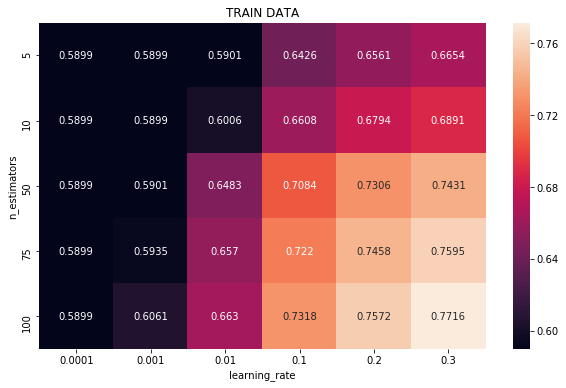

In [171]:
# create a heapmat with rows label as n_estimator , learning_rate as column label , auc score value in each box 
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
import matplotlib.pyplot as plt
import seaborn as sns


heat_map = heat_dataframe.pivot('n_estimators','learning_rate','train_score')
fig,ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(heat_map,annot=True,fmt='.4g')
ax.set_title('TRAIN DATA')

In [172]:
# built the dataframe for heat map for cv data 

heat_data = {'n_estimators':n_estimators,'learning_rate':learning_rate,'cv_score':cv_score}

heat_dataframe = pd.DataFrame(heat_data)

heat_dataframe

,n_estimators,learning_rate,cv_score
0,5,0.0001,0.588719
1,10,0.0001,0.588719
2,50,0.0001,0.588719
3,75,0.0001,0.588719
4,100,0.0001,0.588719
5,5,0.001,0.588719
6,10,0.001,0.588719
7,50,0.001,0.588843
8,75,0.001,0.591797
9,100,0.001,0.603118


Text(0.5,1,'CV DATA')

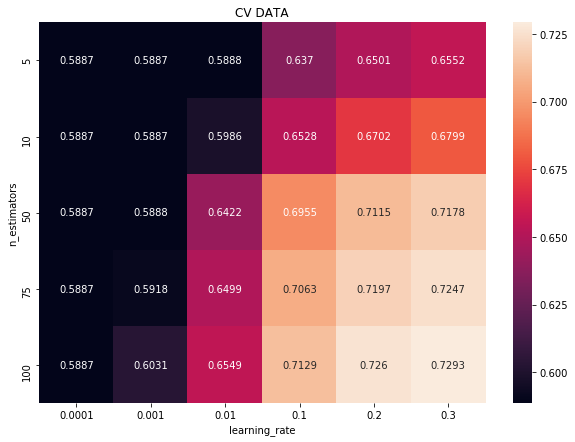

In [173]:
# create a heapmat with rows label as n_estimator , learning_rate as column label , auc score value in each box 

heat_map = heat_dataframe.pivot('n_estimators','learning_rate','cv_score')
fig,ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(heat_map,annot=True,fmt='.4g')
ax.set_title('CV DATA')

In [174]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

### ROC AUC plot for SET 1

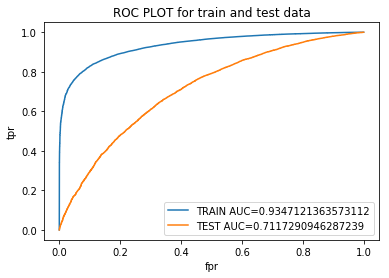

In [175]:
# build the final model with best parameter value 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,auc

y_train_pred = []
y_test_pred =[]


gbdt_model = lgb.LGBMClassifier(objective='binary',learning_rate = best_parameter['learning_rate'],n_estimators =best_parameter['n_estimators'],class_weight='balanced')
gbdt_model=gbdt_model.fit(x_tr_tfidf,y_train)

y_train_pred = batch_predict(gbdt_model,x_tr_tfidf)
y_test_pred = batch_predict(gbdt_model,x_te_tfidf)

# by the help of of probability estimate and true_predicted we calculated the roc-auc 

train_fpr,train_tpr,train_thresholds = roc_curve(y_train,y_train_pred)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,y_test_pred)

# now plot the roc_auc_curve for different value of tpr,fpr and threholds 

plt.plot(train_fpr,train_tpr,label='TRAIN AUC='+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label='TEST AUC='+str(auc(test_fpr,test_tpr)))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC PLOT for train and test data')
plt.legend()
plt.show()

#### confusion matrix for set 1

max value of tpr*(1-fpr) 0.43422882154167414 for threshold 0.578


Text(33,0.5,'Actual class')

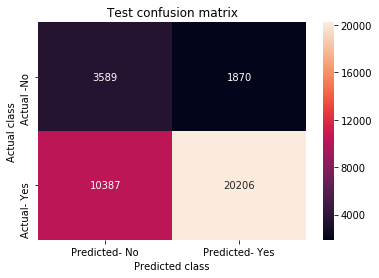

In [176]:
def find_best_threshold(threshold,tpr,fpr):
    t =threshold[np.argmax(tpr*(1-fpr))]
    print('max value of tpr*(1-fpr)',max(tpr*(1-fpr)),'for threshold',np.round(t,3))
    return t 

def predict_with_best_t(proba,best_threshold):
    prediction=[]
    global y_pred
    for value in proba:
        if value < best_threshold:
            prediction.append(0)
        else:
            prediction.append(1)
    y_pred = prediction
    return prediction

# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
            
from sklearn.metrics import confusion_matrix            


print('='*50)
best_threshold = find_best_threshold(test_thresholds,test_tpr,test_fpr)
confusion_matrix_test  = confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_threshold))

ax= plt.subplot()
sns.heatmap(confusion_matrix_test,xticklabels=['Predicted- No','Predicted- Yes'],yticklabels=['Actual -No','Actual- Yes'],annot=True,fmt='d')
ax.set_title('Test confusion matrix')
ax.set_xlabel('Predicted class')
ax.set_ylabel('Actual class')



# Set 2

### hyperparameter tuning for SET 2

In [177]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]    
n_estimators=[5,10,50, 75, 100] 

parameter =dict(learning_rate=learning_rate,n_estimators=n_estimators)

gbdt_model = lgb.LGBMClassifier(objective='binary',max_depth = 2,class_weight='balanced')

clf = GridSearchCV(gbdt_model,param_grid=parameter,scoring='roc_auc',cv=5,return_train_score =True)
clf.fit(x_tr_tfidfW2v,y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.744185,0.085248,0.012168,0.001162,0.0001,5,"{'learning_rate': 0.0001, 'n_estimators': 5}",0.586476,0.586766,0.576369,...,0.584936,0.004311,24,0.591511,0.592203,0.589103,0.591330,0.588340,0.590497,0.001498
1,1.882966,0.103582,0.011968,0.000631,0.0001,10,"{'learning_rate': 0.0001, 'n_estimators': 10}",0.586476,0.586766,0.576369,...,0.584936,0.004311,24,0.591511,0.592203,0.589103,0.591330,0.588340,0.590497,0.001498
2,2.604835,0.148524,0.021543,0.002863,0.0001,50,"{'learning_rate': 0.0001, 'n_estimators': 50}",0.586476,0.586766,0.576369,...,0.584936,0.004311,24,0.591511,0.592203,0.589103,0.591330,0.588340,0.590497,0.001498
3,3.604509,0.648695,0.028583,0.009111,0.0001,75,"{'learning_rate': 0.0001, 'n_estimators': 75}",0.586476,0.586766,0.576369,...,0.584936,0.004311,24,0.591511,0.592203,0.589103,0.591330,0.588340,0.590497,0.001498
4,3.437146,0.409713,0.028942,0.008260,0.0001,100,"{'learning_rate': 0.0001, 'n_estimators': 100}",0.586476,0.586766,0.576369,...,0.584936,0.004311,24,0.591511,0.592203,0.589103,0.591330,0.588340,0.590497,0.001498
5,2.564871,0.482681,0.015558,0.002863,0.001,5,"{'learning_rate': 0.001, 'n_estimators': 5}",0.586476,0.586766,0.576369,...,0.584936,0.004311,24,0.591511,0.592203,0.589103,0.591330,0.588340,0.590497,0.001498
6,1.979251,0.055828,0.014963,0.001678,0.001,10,"{'learning_rate': 0.001, 'n_estimators': 10}",0.586476,0.586766,0.576369,...,0.584936,0.004311,24,0.591511,0.592203,0.589103,0.591330,0.588340,0.590497,0.001498
7,2.734336,0.561502,0.018358,0.002876,0.001,50,"{'learning_rate': 0.001, 'n_estimators': 50}",0.598212,0.601903,0.606233,...,0.605549,0.004929,22,0.605849,0.610820,0.620252,0.617124,0.611148,0.613039,0.005078
8,3.341994,0.567941,0.025542,0.008328,0.001,75,"{'learning_rate': 0.001, 'n_estimators': 75}",0.598712,0.617340,0.610620,...,0.612771,0.007629,21,0.606668,0.627845,0.625064,0.624959,0.619129,0.620733,0.007584
9,3.552377,0.325815,0.027726,0.005897,0.001,100,"{'learning_rate': 0.001, 'n_estimators': 100}",0.617442,0.621504,0.618771,...,0.622466,0.004626,19,0.629530,0.632856,0.634616,0.637582,0.624186,0.631754,0.004596


In [178]:
train_score =results['mean_train_score']
test_score = results['mean_test_score']

n_estimators = results['param_n_estimators']
learning_rate = results['param_learning_rate']

train_score = list(train_score)
test_score = list(test_score)



In [179]:
best_parameter = clf.best_params_
best_parameter

{'learning_rate': 0.3, 'n_estimators': 100}

In [180]:
# create a dataframe for making heatmap with rows representing n_estimators , column representing learning_rate , box containing auc score

heat_data = {'n_estimators':n_estimators,'learning_rate':learning_rate,'train_score':train_score}

heat_dataframe = pd.DataFrame(heat_data)

#heat_dataframe

Text(0.5,1,'TRAIN_DATA')

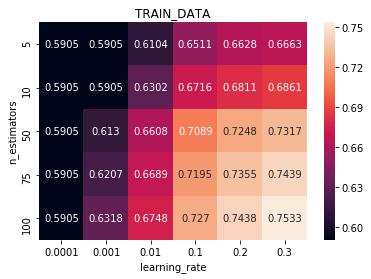

In [181]:
# create a heatmap with help of dataframe 

heat_dataframe = heat_dataframe.pivot('n_estimators','learning_rate','train_score')
ax = sns.heatmap(heat_dataframe,annot=True,fmt='.4g')
ax.set_title('TRAIN_DATA')


In [182]:
heat_data = {'n_estimators':n_estimators,'learning_rate':learning_rate,'test_score':test_score}

heat_dataframe = pd.DataFrame(heat_data)

#heat_dataframe

Text(0.5,1,'TEST_DATA')

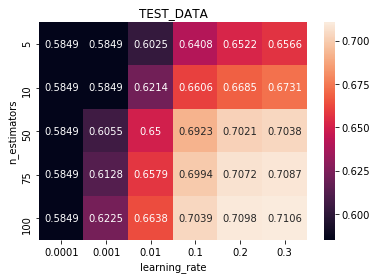

In [183]:
# create a heatmap with help of dataframe 

heat_dataframe = heat_dataframe.pivot('n_estimators','learning_rate','test_score')
ax = sns.heatmap(heat_dataframe,annot=True,fmt='.4g')
ax.set_title('TEST_DATA')

### roc plot for set 2 

In [184]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

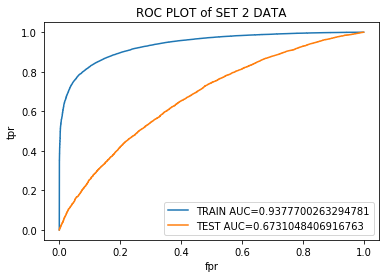

In [185]:
y_train_pred=[]
y_test_pred= []

gbdt_model = lgb.LGBMClassifier(objective='binary',n_estimators=best_parameter['n_estimators'],learning_rate =best_parameter['learning_rate'],class_weight='balanced')
gbdt_model=gbdt_model.fit(x_tr_tfidfW2v,y_train)

y_train_pred = batch_predict(gbdt_model,x_tr_tfidfW2v)
y_test_pred = batch_predict(gbdt_model,x_te_tfidfW2v)

# by the help of of probability estimate and true_predicted we calculated the roc-auc 

train_fpr,train_tpr,train_thresholds = roc_curve(y_train,y_train_pred)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,y_test_pred)

# now plot the roc_auc_curve for different value of tpr,fpr and threholds 

plt.plot(train_fpr,train_tpr,label='TRAIN AUC='+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label='TEST AUC='+str(auc(test_fpr,test_tpr)))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC PLOT of SET 2 DATA')
plt.legend()
plt.show()

##### confusion matrix for set 2

max value of tpr*(1-fpr) 0.39240558551531074 for threshold 0.565


Text(33,0.5,'Actual class')

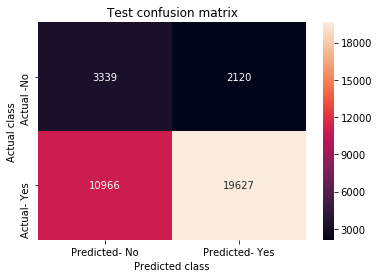

In [186]:
def find_best_threshold(threshold,tpr,fpr):
    t =threshold[np.argmax(tpr*(1-fpr))]
    print('max value of tpr*(1-fpr)',max(tpr*(1-fpr)),'for threshold',np.round(t,3))
    return t 

def predict_with_best_t(proba,best_threshold):
    prediction=[]
    global y_pred
    for value in proba:
        if value < best_threshold:
            prediction.append(0)
        else:
            prediction.append(1)
    y_pred = prediction
    return prediction

# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
            
from sklearn.metrics import confusion_matrix            


print('='*50)
best_threshold = find_best_threshold(test_thresholds,test_tpr,test_fpr)
confusion_matrix_test  = confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_threshold))

ax= plt.subplot()
sns.heatmap(confusion_matrix_test,xticklabels=['Predicted- No','Predicted- Yes'],yticklabels=['Actual -No','Actual- Yes'],annot=True,fmt='d')
ax.set_title('Test confusion matrix')
ax.set_xlabel('Predicted class')
ax.set_ylabel('Actual class')

# 3. Summary 


as mentioned in the step 4 of instructions

In [189]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names= ['vectorizer','model','hyperparameter','AUC']
x.add_row(['Tfidf','GBDT','learning rate = 0.3,n_estimator=100',0.711729094628739])
x.add_row(['TfidfW2v','GBDT','learning_rate=0.3,n_estimator=100',0.6731048406916763])

print(x)

+------------+-------+-------------------------------------+--------------------+
| vectorizer | model |            hyperparameter           |        AUC         |
+------------+-------+-------------------------------------+--------------------+
|   Tfidf    |  GBDT | learning rate = 0.3,n_estimator=100 | 0.711729094628739  |
|  TfidfW2v  |  GBDT |  learning_rate=0.3,n_estimator=100  | 0.6731048406916763 |
+------------+-------+-------------------------------------+--------------------+
